In [55]:
#p3bank
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv(r"C:\Users\Shree\ml practicle\Churn_Modelling.csv")  # Read CSV file using raw string to handle backslashes correctly
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df.shape

(10000, 14)

In [57]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [59]:
# Input data - selecting feature columns for the model
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

# Output data - selecting the target column (what we want to predict)
y = df['Exited']

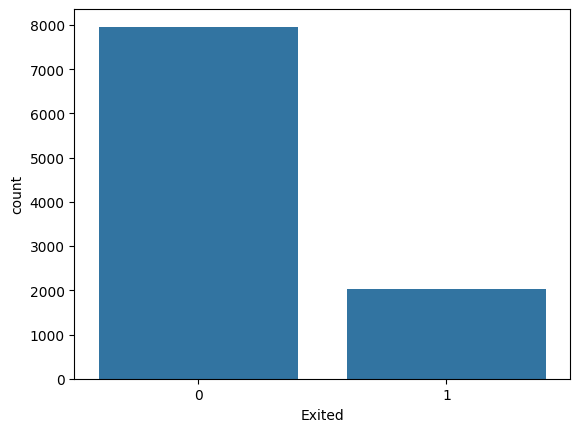

In [60]:
sns.countplot(x=y);

In [61]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [62]:
# Normalise
from sklearn.preprocessing import StandardScaler

In [63]:
Scaler =StandardScaler()

In [64]:
x_scaled=Scaler.fit_transform(x)

In [65]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.91158349,
         0.64609167,  0.97024255],
       [-0.44003595,  0.19816383, -1.38753759, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [-1.53679418,  0.29351742,  1.03290776, ...,  2.52705662,
         0.64609167, -1.03067011],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.80773656,
         0.64609167, -1.03067011],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.91158349,
         0.64609167, -1.03067011]], shape=(10000, 7))

In [ ]:
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [69]:
x.shape

(10000, 7)

In [71]:
x_train.shape

(7500, 7)

In [72]:
x_test.shape

(2500, 7)

In [73]:
from sklearn.neural_network import MLPClassifier

In [74]:
# Create a Multi-Layer Perceptron classifier with 3 hidden layers (100 neurons each), fixed random seed, 100 iterations, and Adam optimizer
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, solver='adam')

In [75]:
ann.fit(x_train,y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,0


In [76]:
y_pred = ann.predict(x_test)

In [77]:
# Import evaluation metrics: confusion matrix display, classification report, and accuracy score functions
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [78]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

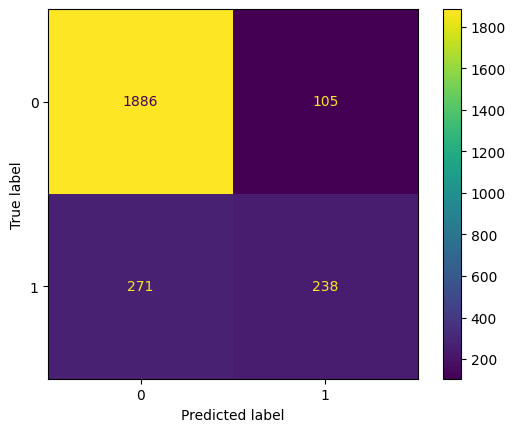

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [80]:
accuracy_score(y_test,y_pred)

0.8496

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1991
           1       0.69      0.47      0.56       509

    accuracy                           0.85      2500
   macro avg       0.78      0.71      0.73      2500
weighted avg       0.84      0.85      0.84      2500



In [82]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from imblearn.over_sampling import RandomOverSampler

In [84]:
ros = RandomOverSampler (random_state =0)

In [85]:
x_res,y_res = ros.fit_resample(x,y)

In [86]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [87]:
# Normalise
from sklearn.preprocessing import StandardScaler

In [88]:
Scaler =StandardScaler()

In [89]:
x_scaled=Scaler.fit_transform(x_res)

In [90]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ..., -0.75606167,
         0.6512495 ,  1.08223556],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -0.75606167,
        -1.53550983,  1.08223556],
       [-1.48597169,  0.08418894,  1.03929402, ...,  2.20861596,
         0.6512495 , -0.92401325],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.72627714,
         0.6512495 , -0.92401325],
       [-0.96847667,  0.65128034, -0.67545605, ..., -0.75606167,
        -1.53550983,  1.08223556],
       [-1.5874413 ,  0.74579558,  1.03929402, ..., -0.75606167,
         0.6512495 ,  1.08223556]], shape=(15926, 7))

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
# Split the scaled features and resampled target into training (75%) and testing (25%) sets with fixed random seed
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.25)
x_res.shape

(15926, 7)

In [93]:
from sklearn.neural_network import MLPClassifier

In [94]:
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100)

In [95]:
ann.fit(x_train,y_train)

,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,100
,shuffle,True
,random_state,0


In [96]:
y_pred = ann.predict(x_test)

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

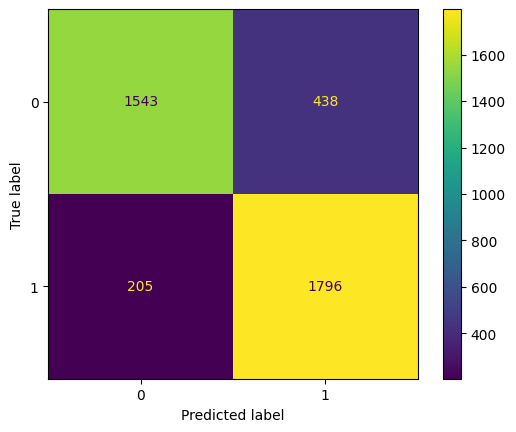

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [99]:
accuracy_score(y_test,y_pred)

0.8385233550979407

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1981
           1       0.80      0.90      0.85      2001

    accuracy                           0.84      3982
   macro avg       0.84      0.84      0.84      3982
weighted avg       0.84      0.84      0.84      3982

